<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Marco Antonio Sánchez Covarrubias. Andrea Flores Fernandez.

**Fecha:** 22 de Noviembre del 2021.

**Expediente** : if720268. if725449.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MarcoSC08/Tarea8.1_MASanchez_AFlores

# Tarea 8: Clase 22

## Valoración de opciones tipo "Put"
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

### Ejercicio 1: $$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

#### Solución estudiante 1

In [82]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [83]:
from datetime import date

In [84]:
from scipy.stats import norm

In [86]:
from datetime import datetime
ticker = 'AAPL'
source = 'stooq'
start = '2017-01-01'
end = datetime.today()
aapl_goo = web.DataReader(ticker, source, start=start)
aapl_goo.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-23,161.120,161.80,159.060,161.41,95861538
2021-11-22,161.680,165.70,161.000,161.02,117467889
2021-11-19,157.650,161.02,156.533,160.55,117305597
2021-11-18,153.710,158.67,153.050,157.87,137827673
2021-11-17,150.995,155.00,150.990,153.49,88807000


In [87]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

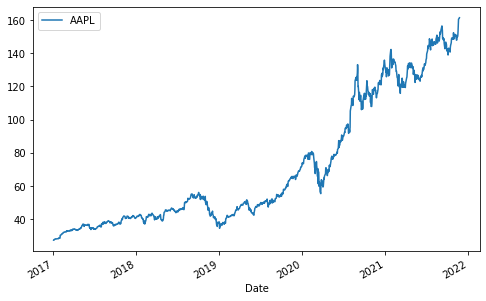

In [88]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [89]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

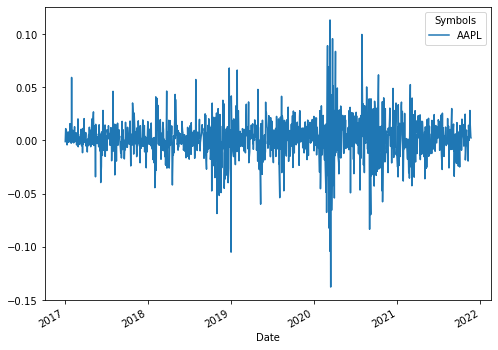

In [90]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [92]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001


In [93]:
today = pd.Timestamp(date.today())
expiry = '2022-09-16'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
                '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
                '2022-09-15', '2022-09-16'],
               dtype='datetime64[ns]', length=214, freq='B'),
 214)

In [94]:
ri = calc_daily_ret(closes_aapl)
#ri

In [95]:
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]


# Simulación del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

In [96]:
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [97]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.001441454784210329, 0.019197989267075104)

In [98]:
r = 0.00018/360 # Tasa diaria # Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%

In [99]:
today = pd.to_datetime(date.today())
expiry = '2022-09-16'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

In [100]:
ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=214, freq='B')

In [101]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum().head()

,0,1,2,...,7,8,9
2021-11-23,0.034,0.010,-0.023,...,-0.028,0.001,5.032e-04
2021-11-24,0.025,0.028,-0.036,...,0.005,0.021,3.640e-02
2021-11-25,-0.007,0.018,-0.023,...,0.019,0.026,2.867e-02
2021-11-26,-0.024,0.031,-0.029,...,0.030,0.032,-1.863e-03
2021-11-29,-0.039,0.053,-0.039,...,0.063,0.037,-1.318e-02


In [102]:
so = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = so*np.exp(sim_ret.cumsum())
sim_closes.head()

,0,1,2,...,7,8,9
2021-11-23,167.074,163.079,157.748,...,156.996,161.587,161.491
2021-11-24,165.570,165.977,155.646,...,162.213,164.793,167.393
2021-11-25,160.353,164.410,157.810,...,164.442,165.646,166.104
2021-11-26,157.565,166.520,156.849,...,166.353,166.701,161.110
2021-11-29,155.264,170.175,155.170,...,171.930,167.507,159.297


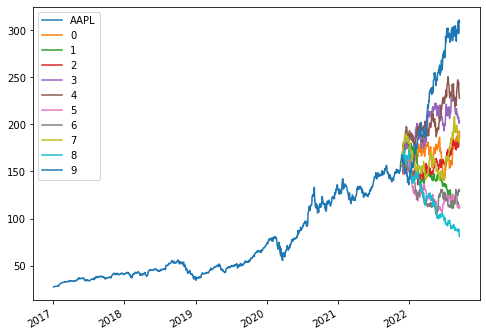

In [103]:
# Precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize = (8,6));

In [104]:
Hoy = date.today()
expiry = '2022-09-16'
K = 160 # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

Prima    22.36
Name: 2022-06-24 00:00:00, dtype: float64

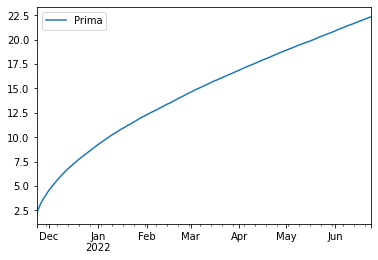

In [112]:
strike = 160 # Valor del call 
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, 
                    index = dates)
call.plot();
call.iloc[-1]

In [113]:
ic = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(ic,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(ic, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(22.063839521930145, 22.655599549138405)
(22.063843103192475, 22.655595967876074)


In [114]:
vol = ret_aapl['AAPL'].std()*np.sqrt(252)
media = ret_aapl['AAPL'].mean()*252
maduracion = ndays
st = closes_aapl.iloc[-1,0]
rf = r*360

In [116]:
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol #Black Scholes
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con B&S es:',put)
print('Valor de la opción simulado es de:',call.iloc[-1].values)

El valor de la opción con B&S es: 18.750530927256193
Valor de la opción simulado es de: [22.35971954]


In [119]:
#put.iloc[-1]

#### Solución estudiante 2

In [15]:
# Librerías necesarias
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Funciones necesarias
def options_yf(ticker):
    stock = yf.Ticker(ticker)
    calls, puts = {}, {}
    def options_yf_(n):
        nonlocal stock
        calls[stock.options[n]] = stock.option_chain(stock.options[n])[0]
        puts[stock.options[n]] = stock.option_chain(stock.options[n])[1]
    [options_yf_(n) for n in range(len(stock.options))]
    return calls, puts

def valuacionPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf, escenarios, 
                  metodo : "Rendimientos simples, Rendimientos logarítmicos, Modelo Normal, Histograma"):
    precios = yf.download(ticker, start = fechaInicio, end = None, progress = False)["Adj Close"]
    precioInicial = precios.iloc[-1] # se descargan los precios
    
    #Metodos 
    if metodo == "Rendimientos simples":
        rendimiento = precios.pct_change().dropna()
        media = rendimiento.mean()
        volatilidad = rendimiento.std()
        
    elif metodo == "Rendimientos logarítmicos":
        rendimiento = np.log(precios / precios.shift(1)).dropna()
        media = rendimiento.mean()
        volatilidad = rendimiento.std()
        
    elif metodo == "Modelo Normal":
        rendimiento = np.log(precios / precios.shift(1)).dropna()
        volatilidad = rendimiento.std()
        
    else:
        rendimiento = np.log(precios / precios.shift(1)).dropna()
        media = rendimiento.mean()
        volatilidad = rendimiento.std()

    # Simulación de precios
    fechas = pd.date_range(start = datetime.date.today(), end = fechaExpiracion, freq = "B") 
    dias = len(fechas)
    
    if metodo == "Rendimientos simples" or metodo == "Rendimientos logarítmicos":
        Z = np.random.randn(dias, escenarios)
        rendimientosSimulados = pd.DataFrame(media + Z * volatilidad, index = fechas)
        
        if metodo == "Rendimientos simples":
            preciosSimulados = precioInicial * (rendimientosSimulados + 1).cumprod()
            preciosSimulados.iloc[0, :] = precioInicial 
    
        else:
            preciosSimulados = precioInicial * np.exp(rendimientosSimulados.cumsum())
            preciosSimulados.iloc[0, :] = precioInicial 
        
    elif metodo == "Modelo Normal":
        Z = np.random.randn(dias, escenarios)
        rendimientosSimulados = pd.DataFrame(volatilidad * Z + rf, index = fechas)
        preciosSimulados = precioInicial * np.exp(rendimientosSimulados.cumsum())
        preciosSimulados.iloc[0, :] = precioInicial
        
    else:
        y, x = np.histogram(rendimiento + rf - media, bins = 2000)
        y = y / np.sum(y)
        rendimientosSimulados_ = np.random.choice(x[1:], dias * escenarios, p = y)
        rendimientosSimulados = pd.DataFrame(rendimientosSimulados_.reshape((dias, escenarios)), index = fechas)
        preciosSimulados = precioInicial * np.exp(rendimientosSimulados.cumsum())
        
    # Valuación
    if metodo == "Simple" or metodo == "Logarítmico":
        put = pd.DataFrame({"Prima" : np.exp(-media * dias) * np.fmax(precioEjercicio - preciosSimulados, 0).mean(axis = 1)}, 
                           index = fechas) 
    else:
        put = pd.DataFrame({"Prima" : np.exp(-rf * dias) * np.fmax(precioEjercicio - preciosSimulados, 0).mean(axis = 1)}, 
                           index = fechas) 
    
    intervaloConfianza = st.norm.interval(0.99, loc = put.iloc[-1].values[0], scale = st.sem(preciosSimulados.iloc[-1]))
    
    # Resultados
    put.plot(figsize = (8, 5), title = metodo)
        
    return put.iloc[-1].values[0], intervaloConfianza[0], intervaloConfianza[1]

In [38]:
def blackScholesPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf):
    # Descarga de precios de cierre históricos para la acción
    precios = yf.download(ticker, start = fechaInicio, end = None, progress = False)["Adj Close"]
    precioInicial = precios.iloc[-1]
    
    # Rendimientos logarítmicos
    rendimiento = np.log(precios / precios.shift(1)).dropna()
    volatilidad = rendimiento.std()
    
    # Black and Scholes
    t = len(pd.date_range(start = datetime.date.today(), end = fechaExpiracion, freq = "B"))
    
    d1 = (np.log(precioInicial / precioEjercicio) + (rf + 0.5 * volatilidad ** 2) * t) / (volatilidad * np.sqrt(t))
    d2 = (np.log(precioInicial / precioEjercicio) + (rf - 0.5 * volatilidad ** 2) * t) / (volatilidad * np.sqrt(t))
    return precioEjercicio * np.exp(-rf * t) * st.norm.cdf(-d2)  - precioInicial * st.norm.cdf(-d1) 

In [39]:
ticker = "MSFT"
fechaExpiracion = "2022-01-21"
calls , puts = options_yf(ticker)
puts = puts[fechaExpiracion][(puts[fechaExpiracion]["strike"] >= 335) & (puts[fechaExpiracion]["strike"] <= 375)]
puts

,contractSymbol,lastTradeDate,strike,...,inTheMoney,contractSize,currency
53,MSFT220121P00335000,2021-11-23 20:57:57,335.0,...,False,REGULAR,USD
54,MSFT220121P00340000,2021-11-23 20:44:05,340.0,...,True,REGULAR,USD
55,MSFT220121P00345000,2021-11-23 20:59:18,345.0,...,True,REGULAR,USD
56,MSFT220121P00350000,2021-11-23 20:57:49,350.0,...,True,REGULAR,USD
57,MSFT220121P00355000,2021-11-23 20:59:05,355.0,...,True,REGULAR,USD
58,MSFT220121P00360000,2021-11-23 19:01:43,360.0,...,True,REGULAR,USD
59,MSFT220121P00365000,2021-11-23 16:45:11,365.0,...,True,REGULAR,USD
60,MSFT220121P00370000,2021-11-23 19:57:41,370.0,...,True,REGULAR,USD
61,MSFT220121P00375000,2021-11-23 15:02:15,375.0,...,True,REGULAR,USD


In [44]:
# Modelo de Black & Scholes
fechaInicio = "2015-11-15" 
indicePut = 56
precioEjercicio = puts.loc[indicePut].strike 
rf = 0.0018 / 360 
N = 10000 
primaReal = puts.loc[indicePut].lastPrice 
primaTeorica = blackScholesPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf)
resultados = pd.DataFrame({"Prima Real" : primaReal, "Prima Teórica B&S" : primaTeorica}, 
                         index = ["K = " + str(precioEjercicio)+ " " + fechaExpiracion])

resultados["% Error relativo (prima real)"] = np.round(abs(primaTeorica - primaReal) / primaReal * 100, 2)
resultados

,Prima Real,Prima Teórica B&S,% Error relativo (prima real)
K = 350.0 2022-01-21,19.0,22.152,16.59


,Prima,Límite inferior (99% confianza),Límite superior (99% confianza),% Error relativo (prima real),% Error relativo (prima teórica B&S)
Rendimientos simples,11.417,10.394,12.440,39.91,48.46
Rendimientos logarítmicos,11.397,10.353,12.441,40.02,48.55
Modelo Normal,21.007,20.034,21.981,10.56,5.17
Histograma,20.309,19.331,21.286,6.89,8.32


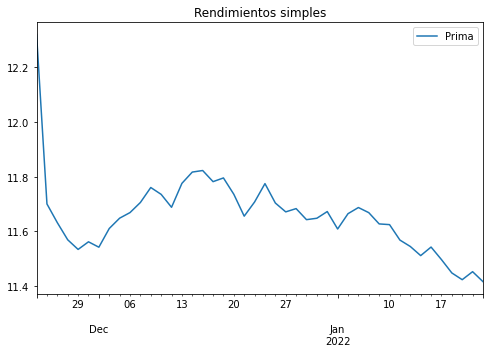

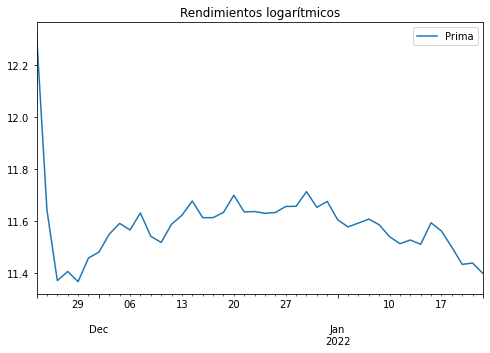

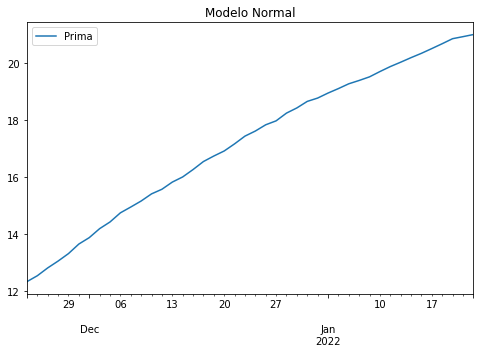

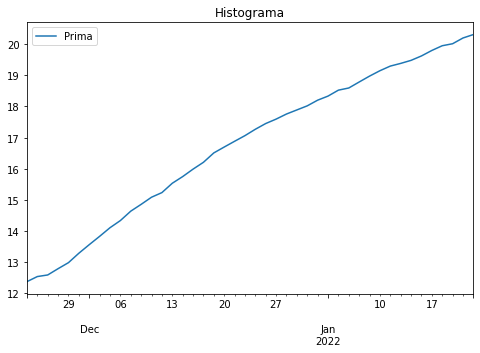

In [41]:
metodos = ["Rendimientos simples", "Rendimientos logarítmicos", "Modelo Normal", "Histograma"]
comparacion = pd.DataFrame([valuacionPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf, N, metodo) 
                       for metodo in metodos],
                       columns = ["Prima", "Límite inferior (99% confianza)", "Límite superior (99% confianza)"], 
                       index = metodos)

comparacion["% Error relativo (prima real)"] = np.round(abs(comparacion["Prima"] - primaReal) / primaReal * 100, 2)
comparacion["% Error relativo (prima teórica B&S)"] = np.round(abs(comparacion["Prima"] - primaTeorica) / primaTeorica * 100, 2)
comparacion

El Modelo Normal y el histograma tienen un mejor rendimiento ya que tienen un error relativo más bajo